In this assignment you will load a dataset and train a Logistic regression Classifier use the techniques discussed in the lesson to measure the performance. We will use the Statlog Shuttle dataset from UCI to train a classifier to predict a full house. After you complete the challenge and the associated assessment questions you will be asked to provide a URL to your Jupyter notebook.
The Dataset
Each record contain 9 numerical attributes. The 10th column is the target column. There are two classes to predict, we will call them positive and negative.

1. Import necessary packages
For this exercise we need

-pandas
-train_test_split
-LogisticRegression
-pyplot from matplotlib
-KNeighborsClassifier
-LogisticRegressionClassifier
-RandomForestClassifier
-DummyClassifier

2. Load and prepare the dataset
Load the training data into a dataframe named df_train_data 
Create binary classification problem - rename some class labels
Create a dataframe of 9 features named X, drop column 9.
Create a data frame of labels named y, select only column 9.
Split the data into a training set and a test set.

3. Create the model
Instantiate a Logistic Regression classifier with a lbfgs solver.
Fit the classifier to the data.

4. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

5. Dummy Classifier
Use the dummy classifier to calculate the accuracy of a purely random chance.

Compare this result to the result of the logistic regression classifier above. What does this result tell you?

 

6. Confusion Matrix
Print the confusion matrix.

7. Plot a nicer confusion matrix (optional)
Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.

8. Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

9. Print a classification report

10. Plot ROC Curve and AUC
Caculate AUC and plot the curve.

11. Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

12. Cross Validation
Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

13. Is this really linear?
Our linear classifier is not giving us accuracy better than the dummy classifier. Suppose that the data was not linearly separable? Instantiate and train a KNN model with k = 7. How does the accuracy of the KNN model compare to the Logistic Regression from above? What does that tell you about the data?

14. Random Forest
Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.

 

Now, some additional questions about analyzing model performance.

Skip to navigation



1. Import necessary packages

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline
import csv

2. Load and prepare the dataset
Load the training data into a dataframe named df_train_data. 
Create binary classification problem - rename some class labels
Create a dataframe of 9 features named X, drop column 9.
Create a data frame of labels named y, select only column 9.
Split the data into a training set and a test set.

In [3]:
#Load data
df_train_data = pd.read_csv("C:\\Users\cholo\Downloads\shuttle.trn", sep=' ', header=0, 
                            names = ['column_0', 'column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6', 
                                     'column_7', 'column_8', 'column_9'])


In [4]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43499 entries, 0 to 43498
Data columns (total 10 columns):
column_0    43499 non-null int64
column_1    43499 non-null int64
column_2    43499 non-null int64
column_3    43499 non-null int64
column_4    43499 non-null int64
column_5    43499 non-null int64
column_6    43499 non-null int64
column_7    43499 non-null int64
column_8    43499 non-null int64
column_9    43499 non-null int64
dtypes: int64(10)
memory usage: 3.3 MB


In [5]:
df_train_data.describe()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9
count,43499.000000,43499.000000,43499.000000,43499.000000,43499.000000,43499.000000,43499.000000,43499.000000,43499.000000,43499.000000
mean,48.249707,-0.205614,85.341755,0.262742,34.528932,1.298306,37.074783,50.899929,13.964413,1.700522
std,12.252756,78.143602,8.908614,41.004603,21.703636,179.488823,13.135619,21.463492,25.648670,1.354663
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


In [6]:
df_train_data.loc[:, "column_9"] = df_train_data.loc[:, "column_9"].apply(lambda x: 1 if x == 1 else 0)
df_train_data

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9
0,55,0,92,0,0,26,36,92,56,0
1,53,0,82,0,52,-5,29,30,2,1
2,37,0,76,0,28,18,40,48,8,1
3,37,0,79,0,34,-26,43,46,2,1
4,85,0,88,-4,6,1,3,83,80,0
...,...,...,...,...,...,...,...,...,...,...
43494,46,5,78,0,46,5,32,32,0,1
43495,37,0,79,-1,10,3,43,69,26,1
43496,48,0,78,3,46,0,30,32,2,1
43497,41,0,79,0,38,-25,38,40,2,1


In [7]:
#Load dataframe 
df_train_data.head()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9
0,55,0,92,0,0,26,36,92,56,0
1,53,0,82,0,52,-5,29,30,2,1
2,37,0,76,0,28,18,40,48,8,1
3,37,0,79,0,34,-26,43,46,2,1
4,85,0,88,-4,6,1,3,83,80,0


In [8]:
df_train_data.isnull()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
43494,False,False,False,False,False,False,False,False,False,False
43495,False,False,False,False,False,False,False,False,False,False
43496,False,False,False,False,False,False,False,False,False,False
43497,False,False,False,False,False,False,False,False,False,False


In [9]:
for column_name in df_train_data.columns:
    print("Unique values in column {} are: {}".format(column_name, df_train_data[column_name].unique()))

Unique values in column column_0 are: [ 55  53  37  85  56  45  38  41  47  49  44 106  79  51  59  39  46  76
 104 101  42  40  81  43  48  57  50  36  58 105  54  52  80  67  83  70
  61  84  82  60  78 107 102  62  66  64  77 108 103  63  65  86  68  75
  73  71  92  90  69  72  27  89 111 123 120  96  87  74 116  97  94 126]
Unique values in column column_1 are: [    0    -1     8     2     3  -318    -5     4     5     1    -4    -3
     7    -2   -67    57     6    -6   -38   -15    -8   -16   -30    -7
   -33    14   -27   -49   -10    36 -1163   -45   -37   -28   -54  -104
   -36   -51   -78   -21   -41   -40  -222  -386   -14     9   -24  -102
   -73   -12    59   -34    -9 -4184  -249   237    67  -105 -4624  -107
   -80    92    10  -172  4254   -39   -17    16   -13   736   -44   -11
   -60  1029   -75    33   -81   -18    22    66   -70  4903  1349   -26
 -1521   -29    21    11   -58    13   -85  -437  -977    32  1958   -64
  -138 -4048   -69  -149    45   -35    48    4

2.  Load and prepare the dataset Load the training data into a dataframe named df_train_data Create binary classification problem - rename some class labels Create a dataframe of 9 features named X, drop column 9. Create a data frame of labels named y, select only column 9. Split the data into a training set and a test set.

In [10]:
#Creating df_x for training set
df_x = df_train_data.drop(['column_9'], axis=1)
df_x

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8
0,55,0,92,0,0,26,36,92,56
1,53,0,82,0,52,-5,29,30,2
2,37,0,76,0,28,18,40,48,8
3,37,0,79,0,34,-26,43,46,2
4,85,0,88,-4,6,1,3,83,80
...,...,...,...,...,...,...,...,...,...
43494,46,5,78,0,46,5,32,32,0
43495,37,0,79,-1,10,3,43,69,26
43496,48,0,78,3,46,0,30,32,2
43497,41,0,79,0,38,-25,38,40,2


In [11]:
#Creating df_y for test set
df_y = pd.DataFrame(df_train_data, columns=['column_9'])
df_y

,column_9
0,0
1,1
2,1
3,1
4,0
...,...
43494,1
43495,1
43496,1
43497,1


In [12]:
df_y.nunique()

column_9    2
dtype: int64

3.Create the model Instantiate a Logistic Regression classifier with a lbfgs solver. Fit the classifier to the data.
Calculate Accuracy Calculate and print the accuracy of the model on the test data.

In [13]:
#spliting the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y.column_9, random_state=2, test_size=0.20)

lr = LogisticRegression(solver='lbfgs', penalty ='none', random_state=2, max_iter=1000)
lr.fit(X_train, y_train)

test_score = lr.score(X_test,y_test)
train_score = lr.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.9714934337193597
Score on test data:  0.9747126436781609


5.  Dummy Classifier Use the dummy classifier to calculate the accuracy of a purely random chance.

In [14]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7839080459770115

6. Confusion Matrix Print the confusion matrix.

In [15]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[6741   79]
 [ 141 1739]]


8.  Calculate Metrics Print the F1, F beta, precision, recall and accuracy scores.

In [16]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions,average= 'weighted')
recall = recall_score(y_test, predictions, average = 'weighted')
f1 = f1_score(y_test, predictions, average = 'weighted')
fbeta_precision = fbeta_score(y_test, predictions, 0.5, average = 'weighted')
fbeta_recall = fbeta_score(y_test, predictions, 2, average = 'weighted')

print('Accuracy score: {:.5f}'.format(accuracy))
print('Precision score: {:.5f}'.format(precision))
print('Recall score: {:.5f}'.format(recall))
print('F1 score: {:.5f}'.format(f1))
print('Fbeta score favoring precision: {:.5f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.5f}'.format(fbeta_recall))

Accuracy score: 0.97471
Precision score: 0.97455
Recall score: 0.97471
F1 score: 0.97456
Fbeta score favoring precision: 0.97453
FBeta score favoring recall: 0.97463


9.  Print a classification report

In [17]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Not Space', 'Space'])
print(dummy_report)

              precision    recall  f1-score   support

   Not Space       0.00      0.00      0.00      1880
       Space       0.78      1.00      0.88      6820

    accuracy                           0.78      8700
   macro avg       0.39      0.50      0.44      8700
weighted avg       0.61      0.78      0.69      8700



C:\Users\cholo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[7.79942094e-01 9.99990599e-01 9.99977223e-01 9.98870157e-01
 5.42499117e-15 9.99778542e-01 9.99892931e-01 9.99760741e-01
 3.71237573e-04 9.96539095e-01 9.92722805e-01 9.99836298e-01
 9.99601238e-01 9.98664531e-01 9.99404331e-01 2.52070459e-01
 9.99554401e-01 9.97511180e-01 9.99591643e-01 1.89702713e-01
 9.99795492e-01 9.99750277e-01 1.14598227e-01 1.93353550e-02
 1.32727102e-05 2.81798396e-01 9.99899954e-01 9.99560089e-01
 9.99448394e-01]


In [19]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])


[0.00053191 0.00053191 0.00106383 0.00106383 0.00159574 0.00159574
 0.00212766 0.00212766 0.00265957 0.00265957 0.00319149 0.00319149
 0.0037234  0.0037234  0.00425532 0.00425532 0.00478723 0.00478723
 0.00531915 0.00531915 0.00585106 0.00585106 0.00638298 0.00638298
 0.00691489 0.00691489 0.00744681 0.00744681 0.00797872]
[0.         0.03944282 0.03944282 0.121261   0.121261   0.20131965
 0.20131965 0.2111437  0.2111437  0.21524927 0.21524927 0.22639296
 0.22639296 0.22653959 0.22653959 0.22741935 0.22741935 0.26744868
 0.26744868 0.30938416 0.30938416 0.38782991 0.38782991 0.50117302
 0.50117302 0.55718475 0.55718475 0.59824047 0.59824047]
[1.         0.99998663 0.99998661 0.9999599  0.99995979 0.99990076
 0.99990076 0.99988816 0.99988787 0.99988296 0.99988287 0.99986923
 0.99986917 0.99986872 0.99986852 0.99986762 0.99986742 0.99982018
 0.99982012 0.99974381 0.99974376 0.99952846 0.99952826 0.99913827
 0.99913809 0.99872979 0.99872906 0.99820383 0.9982028 ]


11. Plot ROC Curve and AUC Caculate AUC and plot the curve.

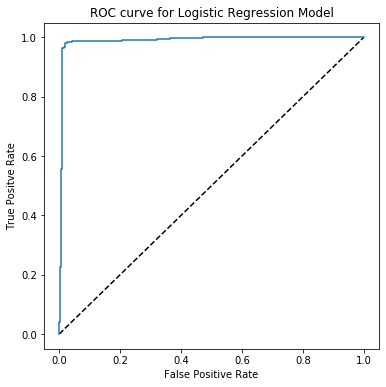

In [20]:
fig = plt.figure(figsize = (6, 6))
plt. plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [21]:
probs = lr.predict_proba(X_test)

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
print(fpr[1:8])
print(tpr[1:8])
print(thresholds[1:8])

[0.075 1.   ]
[0.98841642 1.        ]
[1 0]


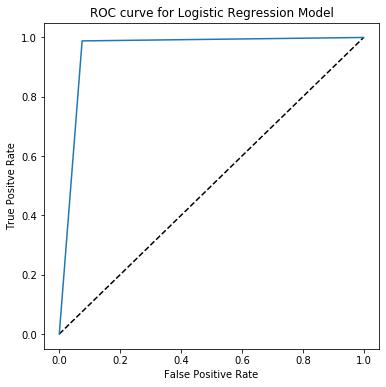

In [23]:
fig = plt.figure(figsize = (6, 6))
plt. plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [35]:
auc = roc_auc_score(y_test, clf.predict(X_test))
print('Area under the ROC curve: {:.3f}'. format(auc))

NameError: name 'clf' is not defined

In [31]:
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

ValueError: bad input shape (8700, 2)

11. Plot Precision-Recall Curve Plot the precision-recall curve for the model above.

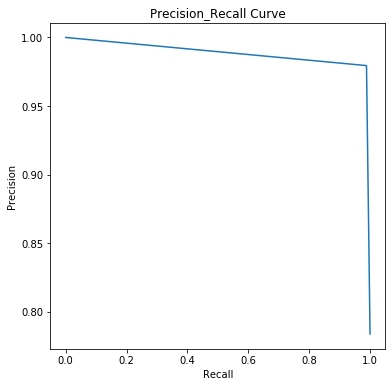

In [32]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall Curve')
plt.show()

12. Cross Validation Perform 5-fold cross validation for a Logistic Regression Classifier. Print the 5 accuracy scores and the mean validation score.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('First split score:{:3f}'.format(lr.score(X-test, y-test)))

X_train, X_test, y_train, y_test = train_test_split(X, y_2, random_state=40)

lr = LogisticRegression(solver='lbfgs')
print('Second splits score: {:.3f}'.format(lr.score(X_test, y_test)))